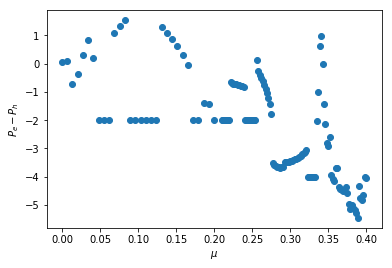

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import sys
from os import path

avg_dir='kw_avg_data/'
out_dir='kw_data_files_dis/'

# parameters
t=1
lam=0.5
mu_sc= 0.18+t - 2*lam
Delta=0.03
t_j=1.0
phi=0.0095
gs=0.
gn=0.04
    
def wf_avg(U0, L, W, SC_width, Llead):
    Lsc=SC_width
    Nrep=1
    N_avg=0
    for i_r in range(Nrep):
        fname= out_dir+ 'twosided_vs_mu_U_%.2f_phi_%.4f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d_Llead_%d_r_%d.npz' % (U0,phi,mu_sc,Delta,t_j,W,L,Lsc,Llead,i_r)
        if path.exists(fname):
            N_avg += 1
            npzfile = np.load(fname)
            if N_avg==1:
                mu_list=npzfile['mu_list']
                Pu=npzfile['Pu']
                Pd=npzfile['Pd']
            else:
                Pu += npzfile['Pu']
                Pd += npzfile['Pd']
    if N_avg>0:
        Pu= Pu/N_avg
        Pd= Pd/N_avg
    cond= Pu[0,:]+Pu[1,:]-Pu[2,:]-Pu[3,:]+\
            Pd[0,:]+Pd[1,:]-Pd[2,:]-Pd[3,:]

    return mu_list, Pu, Pd, cond

mu1, Pu1,Pd1, cond1 =wf_avg(0, W=40, L=30, SC_width=10, Llead=20)
# mu2 , Pu2,Pd2, cond2 =wf_avg(0, W=40, L=30, SC_width=10, Llead=5)
mu3 , Pu3,Pd3, cond3 =wf_avg(0, W=40, L=80, SC_width=10, Llead=40)
mu4 , Pu4,Pd4, cond4 =wf_avg(0, W=40, L=100, SC_width=10, Llead=50)


plt.figure()
# plt.plot(mu_list, Pu.T)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$P_e - P_h$")
# P1=Pu[0,:]+Pu[1,:]-Pu[2,:]-Pu[3,:]
# P2=Pd[0,:]+Pd[1,:]-Pd[2,:]-Pd[3,:]
# plt.legend((r'$e_\uparrow$', r'$e_\downarrow$', r'$h_\uparrow$', r'$h_\downarrow$'))
plt.plot(mu4,cond4,'o')
# plt.plot(mu2, cond2)
# plt.plot(mu3, cond3)
# plt.plot(mu4, cond4)
plt.show()

In [3]:
i1=85
i2=98
print(cond4[i1:i2],mu4[i1:i2])

[-3.18918413 -3.14939051 -3.10889578 -3.06710326 -3.99999969 -3.99999946
 -3.99999907 -3.99999826 -3.99999629 -3.99999031 -2.02061043 -1.01792704
  0.63397812] [0.31555556 0.31747475 0.31939394 0.32131313 0.32323232 0.32515152
 0.32707071 0.3289899  0.33090909 0.33282828 0.33474747 0.33666667
 0.33858586]
